# 녹조 예측 모델 데이터 기반의 유해 남조류 예측 모델링
- 개발자 : 박상욱
- 구간 : 4개(0,1,2,3)

## 0. Load data

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_excel('./녹조예측모델데이터.xls', header = 2)

In [4]:
df.head()

,번호,지점번호,분류,지점명,채수위치,조사일,수온(℃),pH,DO(㎎/ℓ),Chl-a(㎎/㎥),최고기온,최저기온,평균강수량,유해남조류세포수(cells/㎖)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1003G20,호소,충주호,청풍교,2018.07.02,23.8,7.6,6.2,10.4,26.4,19.9,37.7,20
3,2.0,1003G40,호소,충주호,댐앞,2018.07.02,18.7,7.9,10.2,3.3,26.4,19.9,37.7,0
4,3.0,3008G30,호소,대청호,회남,2018.07.02,16.1,7.8,5.3,6.7,25.8,20.7,54.1,398


In [5]:
df = df.drop([0, 1])

In [6]:
df.head()

,번호,지점번호,분류,지점명,채수위치,조사일,수온(℃),pH,DO(㎎/ℓ),Chl-a(㎎/㎥),최고기온,최저기온,평균강수량,유해남조류세포수(cells/㎖)
2,1.0,1003G20,호소,충주호,청풍교,2018.07.02,23.8,7.6,6.2,10.4,26.4,19.9,37.7,20
3,2.0,1003G40,호소,충주호,댐앞,2018.07.02,18.7,7.9,10.2,3.3,26.4,19.9,37.7,0
4,3.0,3008G30,호소,대청호,회남,2018.07.02,16.1,7.8,5.3,6.7,25.8,20.7,54.1,398
5,4.0,3008G50,호소,대청호,문의,2018.07.02,23.7,8.9,12.1,9.6,25.8,20.7,54.1,840
6,5.0,3203G20,호소,보령호,취수탑,2018.07.03,18.2,7.4,5.9,5.0,31.5,23.1,0.0,876


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4455 entries, 2 to 4456
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   번호                 4455 non-null   float64
 1   지점번호               4455 non-null   object 
 2   분류                 4455 non-null   object 
 3   지점명                4455 non-null   object 
 4   채수위치               4455 non-null   object 
 5   조사일                4455 non-null   object 
 6   수온(℃)              4455 non-null   float64
 7   pH                 4455 non-null   float64
 8   DO(㎎/ℓ)            4455 non-null   float64
 9   Chl-a(㎎/㎥)         4453 non-null   float64
 10  최고기온               4455 non-null   float64
 11  최저기온               4455 non-null   float64
 12  평균강수량              4455 non-null   float64
 13  유해남조류세포수(cells/㎖)  4454 non-null   object 
dtypes: float64(8), object(6)
memory usage: 522.1+ KB


In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
번호,4455.0,2229.464198,1287.973826,1.0,1114.5,2228.0,3344.5,4460.0
수온(℃),4455.0,15.832615,7.433757,1.4,9.2,16.2,22.0,32.5
pH,4455.0,7.905993,0.578924,6.0,7.5,7.9,8.3,10.0
DO(㎎/ℓ),4455.0,10.015982,2.511750,1.6,8.2,9.9,11.9,18.4
Chl-a(㎎/㎥),4455.0,15.502447,21.431479,0.0,4.0,8.4,19.1,265.1
최고기온,4455.0,20.469226,9.070435,-4.6,13.3,20.9,27.7,39.8
최저기온,4455.0,9.286891,9.768294,-15.9,1.1,8.4,18.2,28.0
평균강수량,4455.0,3.042222,10.899072,0.0,0.0,0.0,0.1,151.6


### 1. 데이터 전처리

#### 1-1. 결측치 확인

In [9]:
#Check the total number of missing iues
missing_data = df.isna().sum()

In [10]:
missing_data

번호                   0
지점번호                 0
분류                   0
지점명                  0
채수위치                 0
조사일                  0
수온(℃)                0
pH                   0
DO(㎎/ℓ)              0
Chl-a(㎎/㎥)           2
최고기온                 0
최저기온                 0
평균강수량                0
유해남조류세포수(cells/㎖)    1
dtype: int64

In [11]:
#Keep the ones with missing iues
missing_data = missing_data[missing_data > 0]
missing_data

Chl-a(㎎/㎥)           2
유해남조류세포수(cells/㎖)    1
dtype: int64

In [12]:
mode_fill_variables = ['Chl-a(㎎/㎥)', '유해남조류세포수(cells/㎖)']

In [13]:
df['Chl-a(㎎/㎥)'].mode()[0]

2.2

In [14]:
for var in mode_fill_variables: 
    print(var)
    x = df[var]
    mode_i = x.mode()[0]
    
    print(mode_i)
    df[var] = x.fillna(mode_i)

Chl-a(㎎/㎥)
2.2
유해남조류세포수(cells/㎖)
0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4455 entries, 2 to 4456
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   번호                 4455 non-null   float64
 1   지점번호               4455 non-null   object 
 2   분류                 4455 non-null   object 
 3   지점명                4455 non-null   object 
 4   채수위치               4455 non-null   object 
 5   조사일                4455 non-null   object 
 6   수온(℃)              4455 non-null   float64
 7   pH                 4455 non-null   float64
 8   DO(㎎/ℓ)            4455 non-null   float64
 9   Chl-a(㎎/㎥)         4455 non-null   float64
 10  최고기온               4455 non-null   float64
 11  최저기온               4455 non-null   float64
 12  평균강수량              4455 non-null   float64
 13  유해남조류세포수(cells/㎖)  4455 non-null   object 
dtypes: float64(8), object(6)
memory usage: 522.1+ KB


In [16]:
#Check the total number of missing iues
missing_data = df.isna().sum()
missing_data

번호                   0
지점번호                 0
분류                   0
지점명                  0
채수위치                 0
조사일                  0
수온(℃)                0
pH                   0
DO(㎎/ℓ)              0
Chl-a(㎎/㎥)           0
최고기온                 0
최저기온                 0
평균강수량                0
유해남조류세포수(cells/㎖)    0
dtype: int64

In [17]:
#Keep the ones with missing iues
missing_data = missing_data[missing_data > 0]
missing_data

Series([], dtype: int64)

In [18]:
dataf = df.copy()

In [19]:
df2 = df.copy()

#### 1-2. 계절 변수 추가
##### Season Variable
- Spring : 0 (3-5)
- Summer : 1 (6-8)
- Fall : 2 (9-11)
- Winter : 3 (12-2)

In [20]:
df2['date'] = pd.to_datetime(df['조사일'])

In [21]:
df2['month'] = df2['date'].dt.month
df2['year'] = df2['date'].dt.year

In [22]:
df2.head()

,번호,지점번호,분류,지점명,채수위치,조사일,수온(℃),pH,DO(㎎/ℓ),Chl-a(㎎/㎥),최고기온,최저기온,평균강수량,유해남조류세포수(cells/㎖),date,month,year
2,1.0,1003G20,호소,충주호,청풍교,2018.07.02,23.8,7.6,6.2,10.4,26.4,19.9,37.7,20,2018-07-02,7,2018
3,2.0,1003G40,호소,충주호,댐앞,2018.07.02,18.7,7.9,10.2,3.3,26.4,19.9,37.7,0,2018-07-02,7,2018
4,3.0,3008G30,호소,대청호,회남,2018.07.02,16.1,7.8,5.3,6.7,25.8,20.7,54.1,398,2018-07-02,7,2018
5,4.0,3008G50,호소,대청호,문의,2018.07.02,23.7,8.9,12.1,9.6,25.8,20.7,54.1,840,2018-07-02,7,2018
6,5.0,3203G20,호소,보령호,취수탑,2018.07.03,18.2,7.4,5.9,5.0,31.5,23.1,0.0,876,2018-07-03,7,2018


In [23]:
month = []
year = []

for num in range(0, len(df2)):
    m = df2.iloc[num]['month']
    y = df2.iloc[num]['year']
    
    if 3<=m<=5:
        month.append(0)
    if 6<=m<=8:
        month.append(1)
    if 9<=m<=11:
        month.append(2)
    if m==12 or 1<=m<=2:
        month.append(3)
        
    if y == 2018: year.append(0)
    if y == 2019: year.append(1)
    if y == 2020: year.append(2)
    if y == 2021: year.append(3)

In [24]:
def print_clustering(val, name):
    print(f"[{name}]")
    for num in range(0,4):
        print(f"{num} : {val.count(num)}")

In [25]:
print_clustering(month, "month")

[month]
0 : 1152
1 : 1237
2 : 1124
3 : 942


In [26]:
print_clustering(year, "year")

[year]
0 : 776
1 : 1488
2 : 1447
3 : 744


#### 1-3. 예측 모델 결과 변수 추가
##### 유해남조류 세포수 구분
- 0 (0)
- 0 - 1000 (1)
- 1000 - 10k (2)
- 10k+ (3)

In [27]:
result =[]
for val in df['유해남조류세포수(cells/㎖)']:
    #clean the string and convert to double
    val = float(val.replace(',',''))
    if val == 0.0: result.append(0)
    elif val <= 1000.0: result.append(1)
    elif val < 10000.0: result.append(2)
    else: result.append(3)

In [28]:
print_clustering(result, "result")

[result]
0 : 2251
1 : 1503
2 : 477
3 : 224


In [29]:
del_list = ['month', 'year', 'date', '유해남조류세포수(cells/㎖)', '조사일','지점번호']
df2 = df2.drop(columns = del_list)

df2['month'] = month
df2['year'] = year
df2['result'] = result

In [30]:
df2.head()

,번호,분류,지점명,채수위치,수온(℃),pH,DO(㎎/ℓ),Chl-a(㎎/㎥),최고기온,최저기온,평균강수량,month,year,result
2,1.0,호소,충주호,청풍교,23.8,7.6,6.2,10.4,26.4,19.9,37.7,1,0,1
3,2.0,호소,충주호,댐앞,18.7,7.9,10.2,3.3,26.4,19.9,37.7,1,0,0
4,3.0,호소,대청호,회남,16.1,7.8,5.3,6.7,25.8,20.7,54.1,1,0,1
5,4.0,호소,대청호,문의,23.7,8.9,12.1,9.6,25.8,20.7,54.1,1,0,1
6,5.0,호소,보령호,취수탑,18.2,7.4,5.9,5.0,31.5,23.1,0.0,1,0,1


In [31]:
# df2['분류'].replace({'보': 0, '호소': 1, '하천': 2}, inplace=True)

In [32]:
df2.head()

,번호,분류,지점명,채수위치,수온(℃),pH,DO(㎎/ℓ),Chl-a(㎎/㎥),최고기온,최저기온,평균강수량,month,year,result
2,1.0,호소,충주호,청풍교,23.8,7.6,6.2,10.4,26.4,19.9,37.7,1,0,1
3,2.0,호소,충주호,댐앞,18.7,7.9,10.2,3.3,26.4,19.9,37.7,1,0,0
4,3.0,호소,대청호,회남,16.1,7.8,5.3,6.7,25.8,20.7,54.1,1,0,1
5,4.0,호소,대청호,문의,23.7,8.9,12.1,9.6,25.8,20.7,54.1,1,0,1
6,5.0,호소,보령호,취수탑,18.2,7.4,5.9,5.0,31.5,23.1,0.0,1,0,1


#### 1-4. 문자열 데이터를 수치형으로 변환
- 분류(label_class)
- 지점명(label_place)
- 채수위치(label_point)

In [33]:
from sklearn.preprocessing import LabelEncoder

LE = [LabelEncoder(), LabelEncoder(), LabelEncoder()]
string_columns =['분류', '지점명', '채수위치'] #maybe add ph later!

for num, columns in enumerate(string_columns):
    df2[columns] = LE[num].fit_transform(df2[columns]) 

In [34]:
for num in range(0, 3):
    print(LE[num].classes_)

['보' '하천' '호소']
['강정고령보' '공산지' '공주보' '구미보' '낙단보' '낙동강' '달성보' '대청호' '덕동호' '백제보' '보령호' '상주보'
 '안계호' '영천호' '운문호' '진양호' '진전지' '창녕함안보' '충주호' '칠곡보' '합천창녕보']
['강정·고령' '강정고령보 상류500m' '공주보 상류500m' '구미보 상류500m' '낙단보 상류500m' '내동'
 '달성보 상류500m' '댐앞' '문의' '물금·매리' '백제보 상류500m' '상류' '상주보 상류500m' '중앙부'
 '창녕함안보 상류300m' '청풍교' '취수탑' '취수탑2' '칠곡보 상류500m' '칠서' '판문' '하류'
 '합천창녕보 상류500m' '해평' '회남']


In [35]:
label_class = pd.DataFrame({'분류': LE[0].classes_})
label_place = pd.DataFrame({'지점명': LE[1].classes_})
label_point = pd.DataFrame({'채수위치': LE[2].classes_})

In [36]:
label_class

,분류
0,보
1,하천
2,호소


In [37]:
label_place

,지점명
0,강정고령보
1,공산지
2,공주보
3,구미보
4,낙단보
5,낙동강
6,달성보
7,대청호
8,덕동호
9,백제보


In [38]:
label_point

,채수위치
0,강정·고령
1,강정고령보 상류500m
2,공주보 상류500m
3,구미보 상류500m
4,낙단보 상류500m
5,내동
6,달성보 상류500m
7,댐앞
8,문의
9,물금·매리


#### 1-5. 파일 저장

In [39]:
df2.to_csv('numerical_data.csv', encoding = 'utf-8-sig')

### 2. 모델링

In [131]:
df2.head()

,번호,분류,지점명,채수위치,수온(℃),pH,DO(㎎/ℓ),Chl-a(㎎/㎥),최고기온,최저기온,평균강수량,month,year,result
2,1.0,2,18,15,23.8,7.6,6.2,10.4,26.4,19.9,37.7,1,0,1
3,2.0,2,18,7,18.7,7.9,10.2,3.3,26.4,19.9,37.7,1,0,0
4,3.0,2,7,24,16.1,7.8,5.3,6.7,25.8,20.7,54.1,1,0,1
5,4.0,2,7,8,23.7,8.9,12.1,9.6,25.8,20.7,54.1,1,0,1
6,5.0,2,10,16,18.2,7.4,5.9,5.0,31.5,23.1,0.0,1,0,1


In [132]:
df2.drop(['번호'], axis=1, inplace=True)

In [133]:
y = df2['result']
X = df2[df2.columns.difference(['result'])]

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#### 2-1. DecisionTree

In [135]:
from sklearn import tree

DT_clf = tree.DecisionTreeClassifier()
DT_clf = DT_clf.fit(X_train, y_train)

In [136]:
y_pred = DT_clf.predict(X_test)

In [137]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6634255796559462

#### 2-2.  SVM

In [138]:
from sklearn import svm

SVM_clf = svm.SVC(kernel = "rbf")
SVM_clf.fit(X_train, y_train)

SVC()

In [139]:
y_pred = SVM_clf.predict(X_test)

In [140]:
accuracy_score(y_test, y_pred)

0.643979057591623

#### 2-3.  Random Forest

In [141]:
from sklearn.ensemble import RandomForestClassifier

# 학습 진행
RF_clf = RandomForestClassifier(n_estimators=100)
RF_clf.fit(X_train, y_train)

RandomForestClassifier()

In [142]:
# 예측
y_pred = RF_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7539267015706806

#### 2-4.  kNN

In [143]:
from sklearn.neighbors import KNeighborsClassifier

KNN_clf = KNeighborsClassifier(n_neighbors=5)
KNN_clf.fit(X_train, y_train)
KNN_clf.score(X_test, y_test)

0.6574420344053852

#### 2-5. Naive Bayes

In [144]:
from sklearn.naive_bayes import GaussianNB

NB_clf = GaussianNB()
NB_clf.fit(X_train, y_train)
NB_clf.score(X_test, y_test)

0.5385190725504861

### 3. 앙상블 학습

In [145]:
from sklearn.datasets import load_boston
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [146]:
XGB_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [147]:
XGB_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

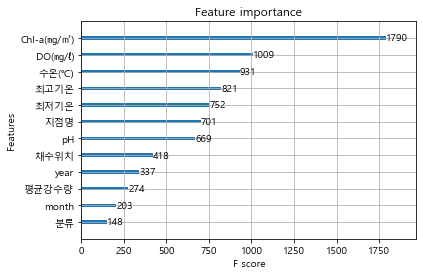

In [148]:
xgboost.plot_importance(XGB_model)

In [149]:
y_pred = XGB_model.predict(X_test)

In [150]:
XGB_model.score(X_test, y_test)

0.6644968187771021

In [151]:
print(explained_variance_score(y_pred, y_test))

0.5056630254031902


#### 4. 모델 재학습
- 중요한 feature 5개 이용

In [152]:
df2.columns

Index(['분류', '지점명', '채수위치', '수온(℃)', 'pH', 'DO(㎎/ℓ)', 'Chl-a(㎎/㎥)', '최고기온',
       '최저기온', '평균강수량', 'month', 'year', 'result'],
      dtype='object')

In [153]:
important_columns = ['Chl-a(㎎/㎥)', '최고기온', '최저기온', 'DO(㎎/ℓ)', '수온(℃)', 'pH', 'result']

In [154]:
df3 = df2[important_columns]

In [155]:
df3.head()

,Chl-a(㎎/㎥),최고기온,최저기온,DO(㎎/ℓ),수온(℃),pH,result
2,10.4,26.4,19.9,6.2,23.8,7.6,1
3,3.3,26.4,19.9,10.2,18.7,7.9,0
4,6.7,25.8,20.7,5.3,16.1,7.8,1
5,9.6,25.8,20.7,12.1,23.7,8.9,1
6,5.0,31.5,23.1,5.9,18.2,7.4,1


In [156]:
y = df3['result']
X = df3[df3.columns.difference(['result'])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [157]:
y_pred = list()
y_acc = list()

DT_clf = tree.DecisionTreeClassifier()
DT_clf = DT_clf.fit(X_train, y_train)
y_pred.append(DT_clf.predict(X_test))
y_acc.append(DT_clf.score(X_test, y_test))

SVM_clf = svm.SVC(kernel = "rbf")
SVM_clf.fit(X_train, y_train)
y_pred.append(SVM_clf.predict(X_test))
y_acc.append(SVM_clf.score(X_test, y_test))

RF_clf = RandomForestClassifier(n_estimators=100)
RF_clf.fit(X_train, y_train)
y_pred.append(RF_clf.predict(X_test))
y_acc.append(RF_clf.score(X_test, y_test))

KNN_clf = KNeighborsClassifier(n_neighbors=5)
KNN_clf.fit(X_train, y_train)
y_pred.append(KNN_clf.predict(X_test))
y_acc.append(KNN_clf.score(X_test, y_test))

NB_clf = GaussianNB()
NB_clf.fit(X_train, y_train)
y_pred.append(NB_clf.predict(X_test))
y_acc.append(NB_clf.score(X_test, y_test))

In [158]:
y_pred

[array([2, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([1, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([1, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([2, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([2, 1, 0, ..., 0, 1, 1], dtype=int64)]

In [159]:
y_acc

[0.5572176514584891,
 0.6260284218399401,
 0.6462228870605834,
 0.5991024682124159,
 0.49364248317127896]

In [161]:
import statsmodels.api as sm

## 전진 선택법
variables = df2.columns[:-1].tolist() ## 설명 변수 리스트
 
y = df2['result'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0

while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df2[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df2[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

<ipython-input-161-5bf6fbdfbdf4>:17: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
C:\Users\user\anaconda3\envs\torch37\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\user\anaconda3\envs\torch37\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\user\anaconda3\envs\torch37\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\user\anaconda3\en

In [162]:
selected_variables

['수온(℃)', '분류', 'month', 'pH', '채수위치', 'Chl-a(㎎/㎥)', '지점명', 'year', 'DO(㎎/ℓ)']

In [163]:
selected_variables.append('result')

In [165]:
df4 = df2[selected_variables]

In [166]:
df4.head()

,수온(℃),분류,month,pH,채수위치,Chl-a(㎎/㎥),지점명,year,DO(㎎/ℓ),result
2,23.8,2,1,7.6,15,10.4,18,0,6.2,1
3,18.7,2,1,7.9,7,3.3,18,0,10.2,0
4,16.1,2,1,7.8,24,6.7,7,0,5.3,1
5,23.7,2,1,8.9,8,9.6,7,0,12.1,1
6,18.2,2,1,7.4,16,5.0,10,0,5.9,1


In [167]:
y = df4['result']
X = df4[df4.columns.difference(['result'])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [168]:
y_pred = list()
y_acc = list()

DT_clf = tree.DecisionTreeClassifier()
DT_clf = DT_clf.fit(X_train, y_train)

SVM_clf = svm.SVC(kernel = "rbf")
SVM_clf.fit(X_train, y_train)

RF_clf = RandomForestClassifier(n_estimators=100)
RF_clf.fit(X_train, y_train)

KNN_clf = KNeighborsClassifier(n_neighbors=5)
KNN_clf.fit(X_train, y_train)

NB_clf = GaussianNB()
NB_clf.fit(X_train, y_train)

In [168]:
y_pred.append(DT_clf.predict(X_test))
y_pred.append(SVM_clf.predict(X_test))
y_pred.append(RF_clf.predict(X_test))
y_pred.append(KNN_clf.predict(X_test))
y_pred.append(NB_clf.predict(X_test))

y_acc.append(DT_clf.score(X_test, y_test))
y_acc.append(SVM_clf.score(X_test, y_test))
y_acc.append(RF_clf.score(X_test, y_test))
y_acc.append(KNN_clf.score(X_test, y_test))
y_acc.append(NB_clf.score(X_test, y_test))

In [169]:
y_acc

[0.6828721017202692,
 0.6529543754674645,
 0.7599102468212415,
 0.6948391922213911,
 0.5968586387434555]

### 5. 테스트

In [170]:
df4.head()

,수온(℃),분류,month,pH,채수위치,Chl-a(㎎/㎥),지점명,year,DO(㎎/ℓ),result
2,23.8,2,1,7.6,15,10.4,18,0,6.2,1
3,18.7,2,1,7.9,7,3.3,18,0,10.2,0
4,16.1,2,1,7.8,24,6.7,7,0,5.3,1
5,23.7,2,1,8.9,8,9.6,7,0,12.1,1
6,18.2,2,1,7.4,16,5.0,10,0,5.9,1


In [172]:
X_test.head()

,Chl-a(㎎/㎥),DO(㎎/ℓ),month,pH,year,분류,수온(℃),지점명,채수위치
2857,5.2,7.1,1,7.6,2,1,25.9,5,23
695,1.5,8.6,0,7.5,2,2,11.6,7,24
1431,0.6,8.4,2,6.8,0,2,13.7,14,7
1202,3.4,5.9,1,7.1,0,2,17.9,14,7
3917,23.3,15.0,3,8.1,1,1,4.0,5,0


In [230]:
new_value = "0 1 3 7.0 1 5.0 1 1 7.0 1"
new_value = new_value.split()

In [232]:
columns = "수온(℃)	분류	month	pH	채수위치	Chl-a(㎎/㎥)	지점명	year	DO(㎎/ℓ)	result"
columns = columns.split()

In [234]:
new_dict = dict(zip(columns, new_value))

In [235]:
new_dict

{'수온(℃)': '0',
 '분류': '1',
 'month': '3',
 'pH': '7.0',
 '채수위치': '1',
 'Chl-a(㎎/㎥)': '5.0',
 '지점명': '1',
 'year': '1',
 'DO(㎎/ℓ)': '7.0',
 'result': '1'}

In [236]:
new_df = pd.DataFrame([new_dict])
new_df

,수온(℃),분류,month,pH,채수위치,Chl-a(㎎/㎥),지점명,year,DO(㎎/ℓ),result
0,0,1,3,7.0,1,5.0,1,1,7.0,1


In [237]:
test = new_df[new_df.columns.difference(['result'])]

In [238]:
test

,Chl-a(㎎/㎥),DO(㎎/ℓ),month,pH,year,분류,수온(℃),지점명,채수위치
0,5.0,7.0,3,7.0,1,1,0,1,1


In [241]:
y_pred2 = list()

# y_pred2.append(DT_clf.predict(test))
# y_pred2.append(SVM_clf.predict(test))
y_pred2.append(RF_clf.predict(test))
# y_pred2.append(KNN_clf.predict(test))
# y_pred2.append(NB_clf.predict(test))

In [242]:
y_pred2

[array([0], dtype=int64)]

### 6. 테스트 예측 모델

In [262]:
columns = "수온(℃)	분류	month	pH	채수위치	Chl-a(㎎/㎥)	지점명	year	DO(㎎/ℓ)	result"
columns = columns.split()
new_value = "0 1 3 7.0 1 5.0 1 1 7.0 1"
new_value = new_value.split()

In [263]:
new_dict = dict(zip(columns, new_value))
new_df = pd.DataFrame([new_dict])
test = new_df[new_df.columns.difference(['result'])]

In [264]:
RF_clf.predict(test)[0]

0